In [1]:
import random 
import numpy as np
import cvxpy as cp
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt

from itertools import combinations, permutations

In [2]:
def set_capacity(G, edges):
    '''Function that receives a dictionary (key = edge; value = capacity) and sets the capacities to G '''
    for edge, capacity in edges.items():
        if capacity != 'inf':
            G[edge[0]][edge[1]]['capacity'] = int(capacity)
        else:
             G[edge[0]][edge[1]]['capacity'] = float(capacity)

# Exercise

In [3]:
#Graph creation
edges = [('o', 'a'), ('a', 'd'), ('o', 'b'), ('b', 'd'), ('b', 'c'), ('c', 'd')]
pos = {'o': [0,2], 'a': [2,4], 'b': [2,2], 'c': [2,0], 'd':[4,2]}
G = nx.DiGraph()

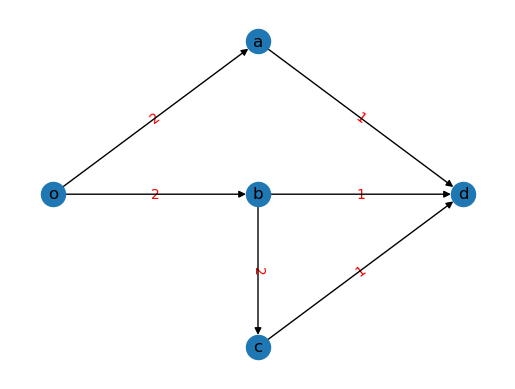

In [4]:
#Plot the initial graph with capacities and edge label
edge_labels = {
    ('o', 'a'): '2', 
    ('a', 'd'): '1',
    ('o', 'b'): '2', 
    ('b', 'd'): '1',
    ('b', 'c'): '2',
    ('c', 'd'): '1',
    }

G.add_edges_from(edge_labels.keys())
set_capacity(G, edge_labels)

nx.draw_networkx_edge_labels(G, pos, edge_labels, font_color='red')
nx.draw(G, pos, with_labels = True)

In [5]:
#search for the min cut capacity in G 
min_cut = nx.algorithms.flow.minimum_cut(G, 'o', 'd')
max_flow = nx.algorithms.flow.maximum_flow(G, 'o', 'd', capacity='capacity')
print(f"Minimum cut capacity is {min_cut[0]} and maximum flow from o to d is {max_flow[0]}")

Minimum cut capacity is 3 and maximum flow from o to d is 3


**What is the minimum aggregate capacity that needs to be removed for no feasible flow from o to d to exist?**

The *Max-Flow Min-Cut Theorem* tells us that the maximum throughput from o to d coincides with the minimum capacity among all o-d cuts. As a consequence of the *Max Flow Min Cut Theorem*, the minimum total capacity that a hypothetical adversary needs to remove from the network in order to disconnect an od path coincides with the min-cut capacity $c^*_{(o,d)}$. Such capacity should be removed from the edges crossing the bottlnecks. 
The min-cut capacity in our graph equals to 3 and it corresponds to the following cuts:
- $U={O,A}$ crossing edges are $e_2$ and $e_3$
- $U={O,A,B,C}$ crossing edges are $e_2$, $e_4$ and $e_6$
  
Infact if such a hypothetical adversary removes all the links capacities in a minimum capacity o-d cut (thus removing a total capacity of $c∗_{(o,d)}$), then the min-cut capacity of the resulting graph would be 0 and the *Min Flow Max Cut Theorem* would imply that there exists no feasible o-d flow in the resulting graph, hence d would not be reachable from o. 
We will remove capacities from the two bottlenecks and show that d is not reachable from o anymore. 

Minimum cut capacity is 0 and maximum flow from o to d is 0


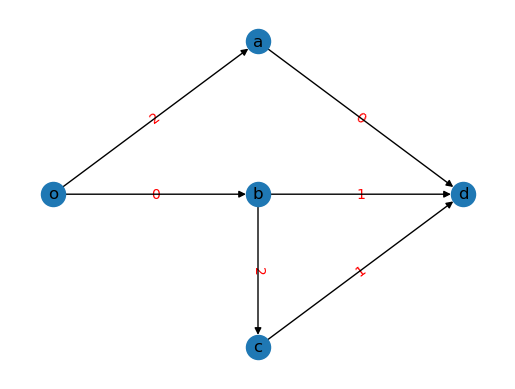

In [6]:
#removing capacity = 1 from e2 and capacity = 2 from e3 (total removed capacity = 3)
edge_labels = {
    ('o', 'a'): '2', 
    ('a', 'd'): '0',
    ('o', 'b'): '0', 
    ('b', 'd'): '1',
    ('b', 'c'): '2',
    ('c', 'd'): '1',
    }

set_capacity(G, edge_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_color='red')
nx.draw(G, pos, with_labels = True)

#search for the min cut capacity in G should be 0
min_cut = nx.algorithms.flow.minimum_cut(G, 'o', 'd')
max_flow = nx.algorithms.flow.maximum_flow(G, 'o', 'd', capacity='capacity')
print(f"Minimum cut capacity is {min_cut[0]} and maximum flow from o to d is {max_flow[0]}")

Minimum cut capacity is 0 and maximum flow from o to d is 0


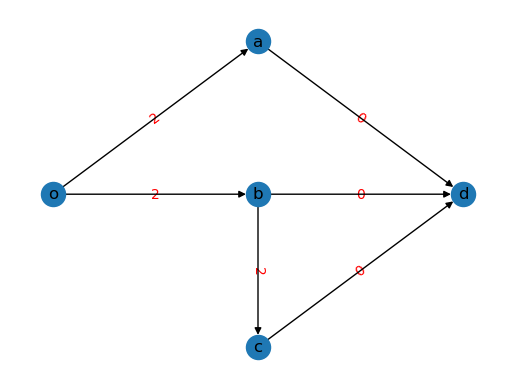

In [7]:
#removing capacity= 1from e2, capacity = 1 from e4 and capacoity = 1 from e6 (total removed capacity = 3)
edge_labels = {
    ('o', 'a'): '2', 
    ('a', 'd'): '0',
    ('o', 'b'): '2', 
    ('b', 'd'): '0',
    ('b', 'c'): '2',
    ('c', 'd'): '0',
    }

set_capacity(G, edge_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_color='red')
nx.draw(G, pos, with_labels = True)

#search for the min cut capacity in G should be 0
min_cut = nx.algorithms.flow.minimum_cut(G, 'o', 'd')
max_flow = nx.algorithms.flow.maximum_flow(G, 'o', 'd', capacity='capacity')
print(f"Minimum cut capacity is {min_cut[0]} and maximum flow from o to d is {max_flow[0]}")

**What is the maximum aggregate capacity that can be removed from the links without affecting the maximum throughput from o to d?**
Since removing capacity from a bottleneck results in a disconnection between note o and node d, then we can remove capacities on all the other cuts. Then. one could think of systematically remove capacities from the cuts starting with the highest-capacity cut until its capacity becomes the minimum one. However, in order not to decrease the maximum throughput the capacity can only be removed from those edges which do not cross any bottleneck.

In our case, the initial cut capacities are, in order:
- $U={o,b}$, $U^C = {a,c,d}$ capacity = 5
- $U={o,c}$, $U^C = {a,b,d}$ capacity = 5
- $U={o,b,c}$, $U^C = {a,d}$ capacity = 4
- $U ={o}$, $U^C={a,b,c,d}$ capacity = 4
- $U={o,a,b}$, $U^C = {c,d}$ capacity = 4
- $U={o,a,c}$, $U^C = {b,d}$ capacity = 4
- $U={o,a,b,c}$, $U^C = {d}$ capacity = 3
- $U={o,a}$, $U^C={b,c,d}$ capacity = 3

We need to remove one unit capacity on one of the cuts with the highest cut capacity (5). All cuts share the available edge $e_1$ so we decrease its capacity of one unot resulting in the following cut capacities:

- $U={o,b}$, $U^C = {a,c,d}$ capacity = 4
- $U={o,c}$, $U^C = {a,b,d}$ capacity = 4
- $U={o,a,b}$, $U^C = {c,d}$ capacity = 4
- $U={o,a,c}$, $U^C = {b,d}$ capacity = 4
- $U={o,b,c}$, $U^C = {a,d}$ capacity = 3
- $U={o,a,b,c}$, $U^C = {d}$ capacity = 3
- $U={o,a}$, $U^C={b,c,d}$ capacity = 3
- $U ={o}$, $U^C={a,b,c,d}$ capacity = 3

If we compute the maximum thourghput that can flow in the network it should still be equals to 3.

Maximum flow is 3


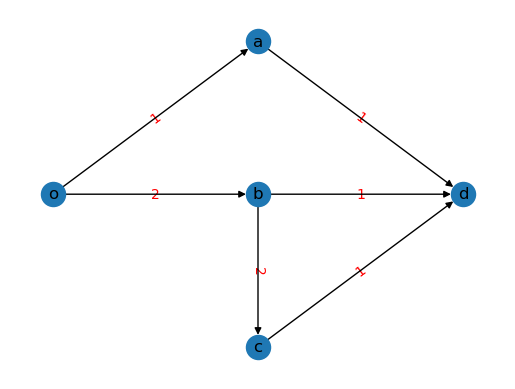

In [8]:
edge_labels = {
    ('o', 'a'): '1', 
    ('a', 'd'): '1',
    ('o', 'b'): '2', 
    ('b', 'd'): '1',
    ('b', 'c'): '2',
    ('c', 'd'): '1',
    }

set_capacity(G, edge_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_color='red')
nx.draw(G, pos, with_labels = True)

#search for the min cut capacity in G should be 3
max_flow = nx.algorithms.flow.maximum_flow(G, 'o', 'd', capacity='capacity')
print(f"Maximum flow is {max_flow[0]}")

Since not all cut capacities are minimum, and there is an available edge $e_5$ from which we can remove one capacity unit. If we decrease its capacity of one unit, then we obtain the following cut capacities:
- $U={o,c}$, $U^C = {a,b,d}$ capacity = 4
- $U={o,a,c}$, $U^C = {b,d}$ capacity = 4
- $U={o,b}$, $U^C = {a,c,d}$ capacity = 3
- $U={o,a,b}$, $U^C = {c,d}$ capacity = 3
- $U={o,b,c}$, $U^C = {a,d}$ capacity = 3
- $U={o,a,b,c}$, $U^C = {d}$ capacity = 3
- $U={o,a}$, $U^C={b,c,d}$ capacity = 3
- $U ={o}$, $U^C={a,b,c,d}$ capacity = 3

and the maximum thoughput should still be equal to 3

Maximum flow is 3


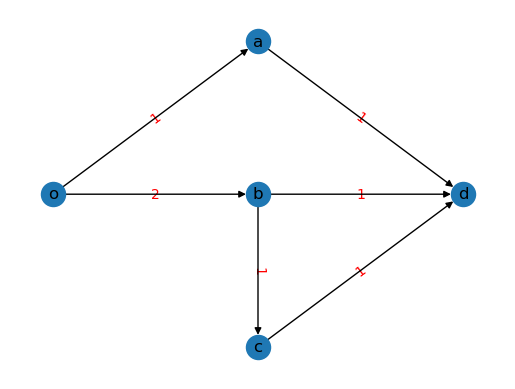

In [9]:
edge_labels = {
    ('o', 'a'): '1', 
    ('a', 'd'): '1',
    ('o', 'b'): '2', 
    ('b', 'd'): '1',
    ('b', 'c'): '1',
    ('c', 'd'): '1',
    }

set_capacity(G, edge_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_color='red')
nx.draw(G, pos, with_labels = True)

#search for the min cut capacity in G should be 3
max_flow = nx.algorithms.flow.maximum_flow(G, 'o', 'd', capacity='capacity')
print(f"Maximum flow is {max_flow[0]}")

We can not remove any other capacity without affecting the throughput. Therefore the total capacity units that can be removed in order to mantain the maximum througput is 2. 

**You are given x > 0 extra units of capacity. How should you distribute them in order to maximize the throughput that can be sent from o to d? Plot the maximum throughput from o to d as a function of x ≥ 0.** \
I first identified the cuts and their initial capacities in G:

In [10]:
def compute_capacities(cuts, G):
    '''function that computes the cut capacities in a Graph'''
    capacities = []
    edges = G.edges
    for c, c_not in cuts:
        cut_capacity = 0
        #biuld the edges in the graph crossing a given cut and computes its cut capacity 
        for start in c:
            cut_capacity += sum([G[start][end]['capacity'] for end in c_not if (start, end) in edges])
        capacities.append(cut_capacity)
    return capacities

In [11]:
nodes = list(G.nodes)
edges = list(G.edges)
node_subsets = []

edge_labels = {
    ('o', 'a'): '2', 
    ('a', 'd'): '1',
    ('o', 'b'): '2', 
    ('b', 'd'): '1',
    ('b', 'c'): '2',
    ('c', 'd'): '1',
    }
set_capacity(G, edge_labels)

#find every U in G
for n_elements in range(1, len(nodes)):
    c = list(combinations(nodes, n_elements))
    node_subsets = node_subsets + c
    
cuts = [element for element in node_subsets if 'o' in element and 'd' not in element]

#find every U_C
difference = []
for c in cuts:
    difference.append(tuple(set(nodes) - set(c)))

#constructs a list of tuples in the form (U, U_c)
cuts = [(c, not_c) for c, not_c in zip(cuts, difference)]

#compute initial cut capacities 
cut_capacities = compute_capacities(cuts, G)


At each iteration we want to identify the bottlenecks, hence the cuts whose capacity limits the maximum throughput. We want to increase the bottleneck capacities, specifically at each iteration we will add a one unit capacity on an edge common to the bottlenecks (if it exists), otherwise on a randomly chosen edge crossing a bottleneck. Then, we recompute the cut capacities for all cuts and check for the max-throughput (i.e., the new min-cut capacity) and save it.

In [12]:
#print initial conditions:
print(f"Initial Max Flow = {min(cut_capacities)}")
print(f"Initial Cut Capacities are:")
for c, cap in zip(cuts, cut_capacities):
    print(c, cap)
print("Starting to increase x\n\n")

Initial Max Flow = 3
Initial Cut Capacities are:
(('o',), ('c', 'a', 'b', 'd')) 4
(('o', 'a'), ('c', 'b', 'd')) 3
(('o', 'b'), ('c', 'a', 'd')) 5
(('o', 'c'), ('a', 'b', 'd')) 5
(('o', 'a', 'b'), ('c', 'd')) 4
(('o', 'a', 'c'), ('b', 'd')) 4
(('o', 'b', 'c'), ('a', 'd')) 4
(('o', 'a', 'b', 'c'), ('d',)) 3
Starting to increase x




In [13]:
def common_edge(bottlenecks, G):
    '''find if the bottlenecks share common edges'''
    edges = set()

    for c, c_not in bottlenecks:
        #gets all edges crossing a cut
        e = set([(start, end) for start in c for end in c_not if (start,end) in G.edges])
        #if some edges have been already identified
        if len(edges)>0: 
            edges = edges.intersection(e)
        #if any edge has been already identified
        else: 
            edges = e
    return list(edges)

In [14]:
#x containt the number of capacity increments that are performed 
x = [0]
#max_flow_increment contains the max throughput that can enter the network 
max_throughput = [min(cut_capacities)]

n_increments = 0

#for reproducibility purposes
random.seed(42)

#run for 10 iterations
for i in range(10):
    #1. find minimum cut capacity 
    min_cut_capacity = min(cut_capacities)

    #2. find bottlenecks 
    bottlenecks = [cut for cut, capacity in zip (cuts, cut_capacities) if capacity == min_cut_capacity]
    
    #3. check for a common edge among all bottlenecks:
    common_edges = common_edge(bottlenecks, G)
    #if there is an intersection 
    if len(common_edges)>0:
        #update capacity on a random chosed edge among the common ones
        edge = random.choice(common_edges)
    else:
        #update capacity on a random edge from a randomly chosen bottleneck
        bn = random.choice(bottlenecks)
        while True:
            edge = (bn[0], bn[1])
            if edge in G.edges:
                break

    G[edge[0]][edge[1]]['capacity'] = G[edge[0]][edge[1]]['capacity'] + 1
    n_increments += 1
    
    #re-compute cut capacities
    cut_capacities = compute_capacities(cuts, G)
    #compute the new min-cut capacity = maximum flow allowed in the network
    max_flow = min(cut_capacities)
    
    #save obtained values
    x.append(n_increments)
    max_throughput.append(max_flow) 

In [15]:
#print final condition after 10 iterations:
print(f"Max Flow = {min(cut_capacities)}")
print(f"Cut Capacities are:")
for c, cap in zip(cuts, cut_capacities):
    print(c, cap)

Max Flow = 8
Cut Capacities are:
(('o',), ('c', 'a', 'b', 'd')) 8
(('o', 'a'), ('c', 'b', 'd')) 8
(('o', 'b'), ('c', 'a', 'd')) 9
(('o', 'c'), ('a', 'b', 'd')) 10
(('o', 'a', 'b'), ('c', 'd')) 9
(('o', 'a', 'c'), ('b', 'd')) 10
(('o', 'b', 'c'), ('a', 'd')) 9
(('o', 'a', 'b', 'c'), ('d',)) 9


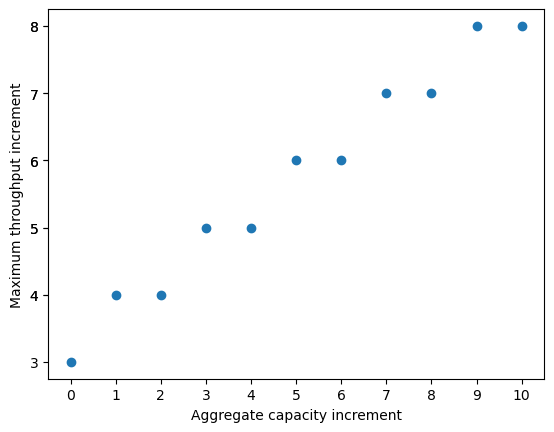

In [16]:
#plot the increments we have found 
plt.ylabel('Maximum throughput increment')
plt.xlabel('Aggregate capacity increment')
plt.xticks(x)
plt.yticks(max_throughput)
plt.scatter(x, max_throughput)
plt.show()

# EXERCISE

In [17]:
#position of nodes in the original graph G
posG = {'p4' : [0,0], 'p3': [0,1], 'p2' : [0,2], 'p1': [0,3], 'b4' : [1,0], 'b3': [1,1], 'b2' : [1,2], 'b1': [1,3]}

#position of nodes in the augmented graph G1 
posG1 = {'o': [-1, 2], 'd':[2, 2], 'p4' : [0,0], 'p3': [0,1], 'p2' : [0,2], 'p1': [0,3], 'b4' : [1,0], 'b3': [1,1], 'b2' : [1,2], 'b1': [1,3]}
        

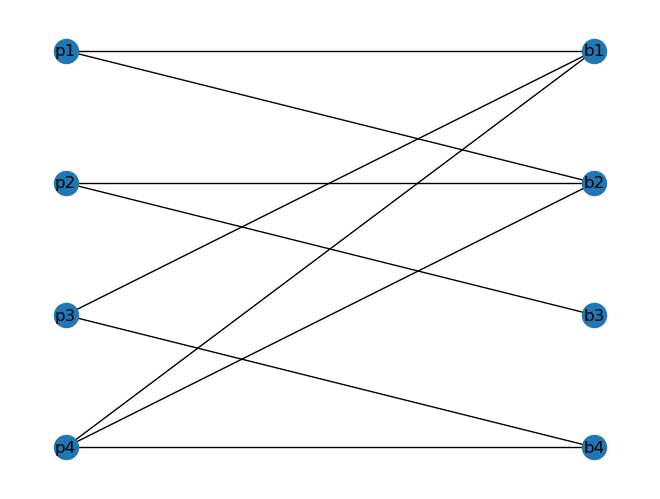

In [18]:
#original graph of the problem 
G = nx.Graph()
edges = [('p1','b1'), ('p1', 'b2'), ('p2', 'b2'), ('p2', 'b3'), ('p3', 'b1'), ('p3', 'b4'), ('p4', 'b1'), ('p4', 'b2'),
         ('p4', 'b4')]
G.add_edges_from(edges)
nx.draw(G, pos= posG, with_labels = True)

**Exploit max-flow problems to find a perfect matching (if any).** \
In order to find a perfect matching one could use the Ford fulkerson algorithm and create the augmented capacitated directed graph G1.

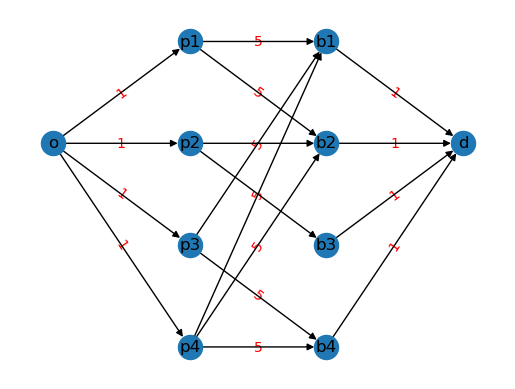

In [19]:
G1 = nx.DiGraph()
edges = [('p1','b1'), ('p1', 'b2'),  ('p2', 'b2'), ('p2', 'b3'), ('p3', 'b1'), ('p3', 'b4'), ('p4', 'b1'), ('p4', 'b2'),
         ('p4', 'b4'), ('o', 'p1'), ('o', 'p2'), ('o','p3'), ('o', 'p4'), ('b1', 'd'), ('b2', 'd'), ('b3', 'd'), ('b4', 'd')]
G1.add_edges_from(edges)

edge_labels= {('o','p1'): '1', ('o','p2'): '1', ('o','p3'): '1', ('o','p4'): '1', ('b1','d'): '1', ('b2','d'): '1',
             ('b3','d'): '1', ('b4','d'): '1', ('p1','b1'): '5', ('p1','b2'): '5', ('p2','b2'): '5', ('p2','b3'): '5', 
             ('p3','b1'): '5', ('p3','b4'): '5', ('p4','b1'): '5', ('p4','b2'): '5', ('p4','b4'): '5'}

nx.draw_networkx_edge_labels(G1, posG1, edge_labels, font_color='red')
nx.draw(G1, posG1, with_labels = True)

A $V_0$ perfect matching exists only if there is a flow of throughput $|V_0|$ in $G1$, in our case a flow of 4.

In [20]:
#compute the min cut capacity of the graph 
set_capacity(G1, edge_labels)
min_cut = nx.algorithms.flow.minimum_cut(G1, 'o', 'd')
print(f'Min cut capacity = {min_cut[0]}')

Min cut capacity = 4


Since a flow of size $|V_0|$ can be sent in the graph, one can search for it and use it to find a perfect matching

In [21]:
def print_flow(G, residualG):
    '''plots the flow found with the previous algorithm'''
    edge_labels = {}
    colors = ['black' for _ in range(len(G.edges))]
    edges = list(G.edges())

    for edge in edges:
        if residualG[edge[0]][edge[1]]['flow'] != 0: #if there is flow in the edge
            colors[edges.index(edge)] = 'red' #highlight the edge 
            edge_labels[(edge[0], edge[1])] = abs(residualG[edge[0]][edge[1]]['flow']) #put the flow label f
    #abs is required since G is undirected graph, hence it has some edges represented as ('p_i', 'b_j') and other edges
    #represented as ('b_j, p_i'). In the residual graph, the edges is in form ('b_x', 'p_y') are those virtual edges due to 
    #the residual graph construction and their flow is negative rewquiring abs() function to be computed

    nx.draw_networkx_edge_labels(G, posG, edge_labels, font_color='b')
    nx.draw(G, posG, with_labels = True, edge_color = colors)

In [22]:
#Final residual graph
residualG = nx.algorithms.flow.preflow_push(G1, 'o', 'd')
#nx.draw(residualG, posG1, with_labels = True)

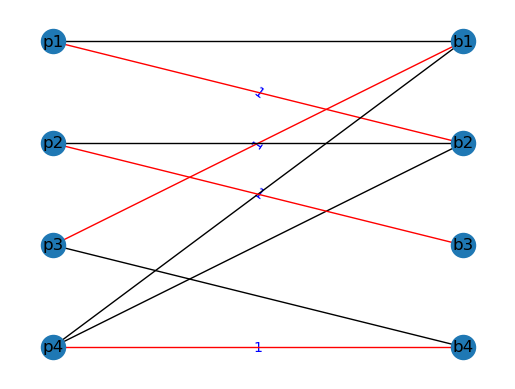

In [23]:
#plot the matching 
print_flow(G, residualG)

**Assume now that there are multiple copies books, and the distribution of the number of copies is (2, 3, 2, 2). Each person can take an arbitrary number of different books. Exploit the analogy with max-flow problems to establish how many books of interest can be assigned in total.** \
One now can see the problem as a problem in which the capacity from $o$ to $p_i$ is the number of books $p_i$ can take (in our case a random number), the capacity from $b_j$ to $d$ is the number of copies available of the j-th book and the capacity from $p_i$ to $b_j$ models the interest of the i-th person in the j-th book (capacity 1, the i-th person can take at most one copy the j-th book). If one can find a flow from $o$ to $d$, then he's able to assign to each person the books of interests without violating the constraints. 

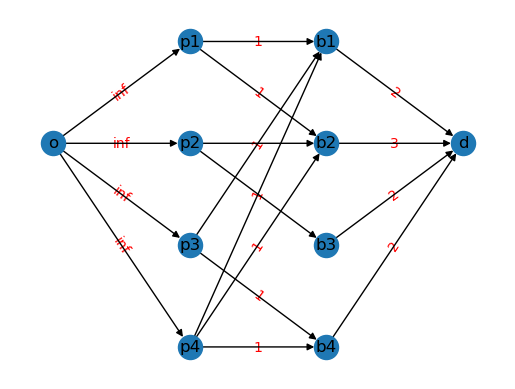

In [24]:
edge_labels = {
    ('p1','b1'): '1',
    ('p1','b2'): '1',
    ('p2','b2'): '1',
    ('p2','b3'): '1',
    ('p3','b1'): '1',
    ('p3','b4'): '1', 
    ('p4','b1'): '1',
    ('p4','b2'): '1',
    ('p4','b4'): '1',
    ('o','p1'): 'inf',
    ('o','p2'): 'inf',
    ('o','p3'): 'inf',
    ('o','p4'): 'inf',
    ('b1','d'): '2',
    ('b2','d'): '3',
    ('b3','d'): '2',
    ('b4','d'): '2'
    }


set_capacity(G1, edge_labels)
nx.draw_networkx_edge_labels(G1, posG1, edge_labels, font_color='red')
nx.draw(G1, posG1, with_labels = True)

In [25]:
#final residual graph
residualG = nx.algorithms.flow.preflow_push(G1, 'o', 'd')
#nx.draw(residualG, posG1, with_labels = True)

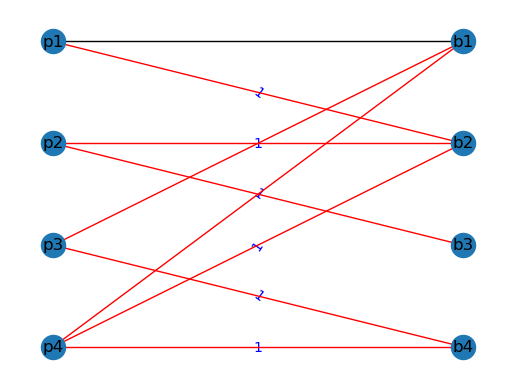

In [26]:
#plot the matching 
print_flow(G, residualG)

**Suppose that the library can sell a copy of a book and buy a copy of another book. Which books should be sold and bought to maximize the number of assigned books?**
In our case, we have two copies of $b_3$, however only a single individual is interested. Therefore, the second copy of $b_3$ will never be assigned. On the other hand, $b_1$ is asked by three individuals, but only two copies are available. In order to maximize the number of assigned book we could sell a copy of $b_3$ and buy a copy of $b_1$. Consequently, we will result in flow along all possible edges, corresponding to all possible books of interests and the maximized number of assigned books. 

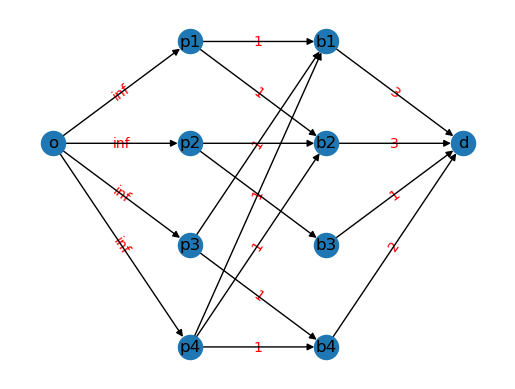

In [27]:
edge_labels = {
    ('p1','b1'): '1',
    ('p1','b2'): '1',
    ('p2','b2'): '1',
    ('p2','b3'): '1',
    ('p3','b1'): '1',
    ('p3','b4'): '1', 
    ('p4','b1'): '1',
    ('p4','b2'): '1',
    ('p4','b4'): '1',
    ('o','p1'): 'inf',
    ('o','p2'): 'inf',
    ('o','p3'): 'inf',
    ('o','p4'): 'inf',
    ('b1','d'): '3',
    ('b2','d'): '3',
    ('b3','d'): '1',
    ('b4','d'): '2'
    }

set_capacity(G1, edge_labels)
nx.draw_networkx_edge_labels(G1, posG1, edge_labels, font_color='red')
nx.draw(G1, posG1, with_labels = True)

In [28]:
#residual graph after the Edmond Karp has ended
residualG = nx.algorithms.flow.preflow_push(G1, 'o', 'd')
#nx.draw(residualG, posG1, with_labels = True)

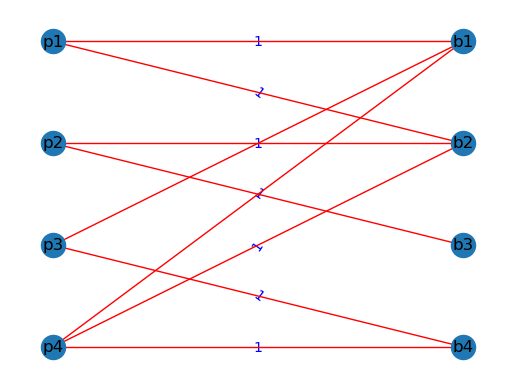

In [29]:
#plot the matching 
print_flow(G, residualG)

# Exercise

In [30]:
f = sp.io.loadmat('flow.mat')["flow"].reshape(28,)
c = sp.io.loadmat('capacities.mat')["capacities"].reshape(28,)
B = sp.io.loadmat('traffic.mat')["traffic"]
l = sp.io.loadmat('traveltime.mat')["traveltime"].reshape(28,)
tau = np.array([le/(1-fe/ce) for le, fe, ce in zip (l, f, c)])

VERTICES = B.shape[0] 
EDGES = B.shape[1]

**Find the shortest path between node 1 and 17. This is equivalent to the fastest path (path with the shortest travelling time) in an empty network**  

In [31]:
#vector of exogenous flows having value 1 in node 1 and -1 in node 17
v = np.zeros(VERTICES)
v[0] = 1
v[VERTICES- 1] = -1

# Construct the problem: min sum_e(le*fe) with contraints Bf = v and 0<=f<=c
f_shortest = cp.Variable(EDGES) 
objective = cp.Minimize(l @ f_shortest) 
constraints = [B @ f_shortest == v, f_shortest >=0] 
prob = cp.Problem(objective, constraints) 

result = prob.solve()

edges = [f'e{index+1}' for index, flow in enumerate(f_shortest.value) if np.isclose(1, flow)]
print(f"Shortest path has length = {result:.2f} supported on the following edges: {edges}")

Shortest path has length = 0.53 supported on the following edges: ['e1', 'e2', 'e9', 'e12', 'e25']


**Find the maximum flow between node 1 and node 17**

In [32]:
def build_edges(B):
    '''iterates over matrix B (NODES x EDGES) and returns a list of edges'''
    edge_list = []
    for edge in range(EDGES):
        start = np.argmax(B[:, edge]) + 1
        end = np.argmin(B[:, edge]) + 1
        edge_list.append((start, end))
    return edge_list
    

In [33]:
#construct the Graph
G = nx.DiGraph()
G.add_edges_from(build_edges(B))

edges_list = {
    (1, 2): 8741,
    (1, 6): 13707,
    (2, 3): 9864,
    (2, 7): 11102,
    (3, 4): 13350,
    (3, 8): 8899, 
    (3, 9): 8970,
    (4, 5): 10926,
    (4, 9): 9753, 
    (5, 14): 9719, 
    (6, 7): 6960,
    (6, 10): 9083,
    (7, 8): 7422, 
    (7, 10): 11216, 
    (8, 9): 6678, 
    (8, 11): 10947, 
    (9, 13): 6297, 
    (9, 12): 10019,
    (13, 14): 6677,
    (13, 17): 10355,
    (14, 17): 9067, 
    (10, 11): 7416,
    (10, 15): 13353,
    (11, 12): 8732, 
    (11, 15): 9403, 
    (15, 16): 11990, 
    (12, 13): 10763,
    (16, 17): 8258
}

set_capacity(G, edges_list)
#search for the max flow in G
max_flow = nx.algorithms.flow.maximum_flow(G, 1, 17, capacity='capacity')
print(f"Maximum flow is {max_flow[0]}")


Maximum flow is 22448


**Given the flow vector in flow.mat, compute the external inflow $\nu$ satisfying $Bf= \nu$**

In [34]:
v = B @f 
print(f"Exogenous flow is {v}")

Exogenous flow is [ 16806   8570  19448   4957   -746   4768    413     -2  -5671   1169
     -5  -7131   -380  -7412  -7810  -3430 -23544]


**In the following, we assume that the exogenous inflow is zero in all the nodes except for node 1, for which $ν_1$ has the same value computed in the point (c), and node 17, for which $ν_{17} = −ν_1$. \
Find the social optimum $f$ with respect to the delays on the different links $\tau_e(f_e)$. For this, minimize the cost function, subject to the flow constraints.**

In [35]:
#construct the exogenus flow vector as requested 
throughput = v[0]
v = np.zeros(VERTICES)
v[0] = throughput
v[VERTICES-1] = - throughput
v =v.astype(int)

In [36]:
#Construct the problem min sum_e(tau_e(fe)*fe) with constrains Bf= v and 0<=f<=c
f_system = cp.Variable(EDGES)
cost_function = np.transpose(c*l) @ (cp.inv_pos(1- cp.multiply(f_system, 1/c)) - 1)

constraints = [B @ f_system == v, f_system >=0, f_system <=c] 
objective = cp.Minimize(cost_function) 
prob = cp.Problem(objective, constraints)

In [37]:
result_system = prob.solve()
print(f"The total cost is {result_system:.2f}")

The total cost is 25943.62


**E. Compute the Wardrop equilibrium $f^{(0)}$**

The integral function of $\tau$ is the following: 
$\int_0^{f_e} \tau(s)ds = -{l_ec_e}\log(1-\frac{f_e}{c_e})$

In [38]:
#Construct problem: minimize integral of tau computed in f_e given the constraints Bf = v, 0<=f<=c
f_wardrop = cp.Variable(EDGES)
tau_integral = -np.transpose(c*l) @ cp.log(1- cp.multiply(f_wardrop, 1/c))

#objective is to minimimize the cost 
constraints = [B @ f_wardrop == v, f_wardrop >=0, f_wardrop<=c] 
objective = cp.Minimize(tau_integral) 
prob = cp.Problem(objective, constraints)
result_wardrop = prob.solve()

In [39]:
#compute the cost f(0)*tau(f(0))
perceived_cost = (l/(1-f_wardrop.value/c)*f_wardrop.value).sum()
print(f"Perceived cost {perceived_cost:.2f}")

Perceived cost 26292.96


In [40]:
#compute price of anarchy
price_of_anarchy = perceived_cost/result_system
print(f"Price of anarchy is {price_of_anarchy:.3f}")

Price of anarchy is 1.013


**Introduce tolls $\omega_e = f_e^* \tau_e'(f_e^*)$ where $f_e^*$ is the flow at the system optimum and computre the Wardrop equilibiurm $f^{(\omega)}$. What do you observe?**

The derivative of $\tau_e(f_e^*)$ is $\frac{l_ec_e}{(c_e-f_e^*)^2}$ , whereas the integral of $\tau_e(s)$ is the one above

In [41]:
#compute w_e = f_e * tau'_e(f_e)
w_e = ((l*c) / (c -f_system.value)**2) * f_system.value

In [42]:
#Construct problem: minimize integral of tau computed in f_e + w_e*f_e given the constraints Bf = v, 0<=f<=c 
f_tolls = cp.Variable(EDGES)
objective_function = -np.transpose(c*l) @ cp.log(1- cp.multiply(f_tolls, 1/c)) + w_e @ f_tolls

#objective is to minimimize the cost 
constraints = [B @ f_tolls == v, f_tolls >=0, f_tolls <=c] 
objective = cp.Minimize(objective_function) 
prob = cp.Problem(objective, constraints) #problem constructed
result = prob.solve()

In [43]:
perceived_cost_tolls = (l/(1-f_tolls.value/c)*f_tolls.value).sum()
print(f"The perceived cost with the tolls introduction is {perceived_cost_tolls:.2f}")

price_of_anarchy_tolls = perceived_cost_tolls/result_system
print(f"Price of anarchy with the tolls introduction is {price_of_anarchy_tolls:.2f}")

The perceived cost with the tolls introduction is 25943.62
Price of anarchy with the tolls introduction is 1.00


**F. Instead of the total travel time, let the cost for the system be the total additional delay compared to the total delay in free flow, given by $\psi_e(f_e) = f_e(\tau_e(f_e)-l_e)$ subject to flow constraints. Compute the system optimum $f^*$ for the costs above. Construct tolls w* such that the Wardrop equilibrium $f^{(\omega*)}$ coincides with $f^*$. Compute the new Wardrop equilibrium to verify your results.**

The new delay function is $\tau_e(f_e)-l_e$. \
Its primitive function for the Wardrop equilibrium is: $\int_0^{f_e} \tau(s)-l_eds = -{l_ec_e}\log(1-\frac{f_e}{c_e}) - l_ef_e$ \
Whereas the derivative for the tolls computation is: $(\tau_e(f_e)-l_e)' = \frac{l_ec_e}{(c_e-f_e^*)^2}$

In [44]:
#Compute system optimum with the new cost function 
f_system = cp.Variable(EDGES)
cost_function = np.transpose(c*l) @ (cp.inv_pos(1- cp.multiply(f_system, 1/c)) - 1) - f_system @ l

constraints = [B @ f_system == v, f_system >=0, f_system<=c] 
objective = cp.Minimize(cost_function) 
prob = cp.Problem(objective, constraints)
result_system = prob.solve()
system_optimum = f_system.value

print(f"The SO-TAP cost is {result_system:.2f}")

The SO-TAP cost is 15095.51


In [45]:
#set w_e = tau_e'(f_e)*f_e where f_e is the flow from the system optimum 
w_tolls = ((l*c) / (c - system_optimum)**2) * system_optimum

In [46]:
#Construct problem: minimize integral of tau computed in f_e + w_e*f_e given the constraints Bf = v, 0<=f<=c 
f_tolls = cp.Variable(EDGES)
objective_function =  -np.transpose(c*l) @ cp.log(1- cp.multiply(f_tolls, 1/c)) - l @ f_tolls + w_tolls @ f_tolls

constraints = [B @ f_tolls == v, f_tolls >=0, f_tolls <=c] 
objective = cp.Minimize(objective_function) 
prob = cp.Problem(objective, constraints) 
result_wardrop = prob.solve()

In [47]:
#Compute perceived cost and price of anarchy 
perceived_cost_tolls = ((l/(1-f_tolls.value/c)-l)*f_tolls.value).sum()
print(f"The perceived cost with the tolls introduction is {perceived_cost_tolls:.2f}")

price_of_anarchy_tolls = perceived_cost_tolls/result_system
print(f"Price of anarchy with the tolls introduction is {price_of_anarchy_tolls:.2f}")

The perceived cost with the tolls introduction is 15095.51
Price of anarchy with the tolls introduction is 1.00
